# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was fine, but no pr..."
1,✅ Trip Verified | British Airways is absolute ...
2,✅ Trip Verified | The flight time was changed ...
3,✅ Trip Verified | I'm so fraustrated. My fli...
4,✅ Trip Verified | We have sat on this plane fo...


In [8]:
import os

# Check if the 'data' folder exists, and if not, create it
if not os.path.exists("data"):
    os.makedirs("data")
    print("Created 'data' folder successfully!")
else:
    print("'data' folder already exists.")


'data' folder already exists.


In [9]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [11]:
# Clean the "Trip Verified" or "Not Verified" and other unnecessary text
df["Cleaned_Review"] = df["reviews"].str.replace("Trip Verified", "", regex=False)
df["Cleaned_Review"] = df["Cleaned_Review"].str.replace("Not Verified", "", regex=False)
df["Cleaned_Review"] = df["Cleaned_Review"].str.strip()  # Remove leading/trailing spaces


In [12]:
# Remove the tick emoji from the text
df["Cleaned_Review"] = df["Cleaned_Review"].str.replace("✅", "", regex=False)

# Display the updated DataFrame
df[["reviews", "Cleaned_Review"]].head()


,reviews,Cleaned_Review
0,"✅ Trip Verified | Check in was fine, but no pr...","| Check in was fine, but no priority/fast tr..."
1,✅ Trip Verified | British Airways is absolute ...,| British Airways is absolute rubbish. I had...
2,✅ Trip Verified | The flight time was changed ...,| The flight time was changed at the last mi...
3,✅ Trip Verified | I'm so fraustrated. My fli...,| I'm so fraustrated. My flight was cancel...
4,✅ Trip Verified | We have sat on this plane fo...,| We have sat on this plane for an hour and ...


In [13]:
import string  # For punctuation removal

# Convert to lowercase and remove punctuation
df["Cleaned_Review"] = df["Cleaned_Review"].str.lower()  # Convert to lowercase
df["Cleaned_Review"] = df["Cleaned_Review"].str.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation

# Display the cleaned text
df[["reviews", "Cleaned_Review"]].head()


,reviews,Cleaned_Review
0,"✅ Trip Verified | Check in was fine, but no pr...",check in was fine but no priorityfast track...
1,✅ Trip Verified | British Airways is absolute ...,british airways is absolute rubbish i had t...
2,✅ Trip Verified | The flight time was changed ...,the flight time was changed at the last min...
3,✅ Trip Verified | I'm so fraustrated. My fli...,im so fraustrated my flight was cancelled...
4,✅ Trip Verified | We have sat on this plane fo...,we have sat on this plane for an hour and f...


In [14]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer (run this only once)
nltk.download('punkt')

# Tokenize the cleaned reviews
df["Tokenized_Review"] = df["Cleaned_Review"].apply(word_tokenize)

# Display the tokenized reviews
df[["Cleaned_Review", "Tokenized_Review"]].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lijis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Cleaned_Review,Tokenized_Review
0,check in was fine but no priorityfast track...,"[check, in, was, fine, but, no, priorityfast, ..."
1,british airways is absolute rubbish i had t...,"[british, airways, is, absolute, rubbish, i, h..."
2,the flight time was changed at the last min...,"[the, flight, time, was, changed, at, the, las..."
3,im so fraustrated my flight was cancelled...,"[im, so, fraustrated, my, flight, was, cancell..."
4,we have sat on this plane for an hour and f...,"[we, have, sat, on, this, plane, for, an, hour..."


In [16]:
import nltk
from nltk.tokenize import word_tokenize

# Download the tokenizer (run this only once)
nltk.download('punkt')

# Tokenize the cleaned reviews
df["Tokenized_Review"] = df["Cleaned_Review"].apply(word_tokenize)

# Display the tokenized reviews
df[["Cleaned_Review", "Tokenized_Review"]].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lijis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Cleaned_Review,Tokenized_Review
0,check in was fine but no priorityfast track...,"[check, in, was, fine, but, no, priorityfast, ..."
1,british airways is absolute rubbish i had t...,"[british, airways, is, absolute, rubbish, i, h..."
2,the flight time was changed at the last min...,"[the, flight, time, was, changed, at, the, las..."
3,im so fraustrated my flight was cancelled...,"[im, so, fraustrated, my, flight, was, cancell..."
4,we have sat on this plane for an hour and f...,"[we, have, sat, on, this, plane, for, an, hour..."


In [17]:
from nltk.corpus import stopwords

# Download the stopwords list (run this only once)
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokenized reviews
df["Tokenized_Review"] = df["Tokenized_Review"].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Display the cleaned tokenized reviews
df[["Cleaned_Review", "Tokenized_Review"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lijis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Cleaned_Review,Tokenized_Review
0,check in was fine but no priorityfast track...,"[check, fine, priorityfast, track, lines, secu..."
1,british airways is absolute rubbish i had t...,"[british, airways, absolute, rubbish, fly, ams..."
2,the flight time was changed at the last min...,"[flight, time, changed, last, minute, without,..."
3,im so fraustrated my flight was cancelled...,"[im, fraustrated, flight, cancelled, last, min..."
4,we have sat on this plane for an hour and f...,"[sat, plane, hour, forty, five, minutes, await..."


In [18]:
# Save the cleaned reviews into a new CSV file
df[["Cleaned_Review"]].to_csv("data/BA_Cleaned_Review.csv", index=False)
print("Cleaned_Review saved to 'data/BA_reviews_lemmatized.csv'!")

Cleaned_Review saved to 'data/BA_reviews_lemmatized.csv'!


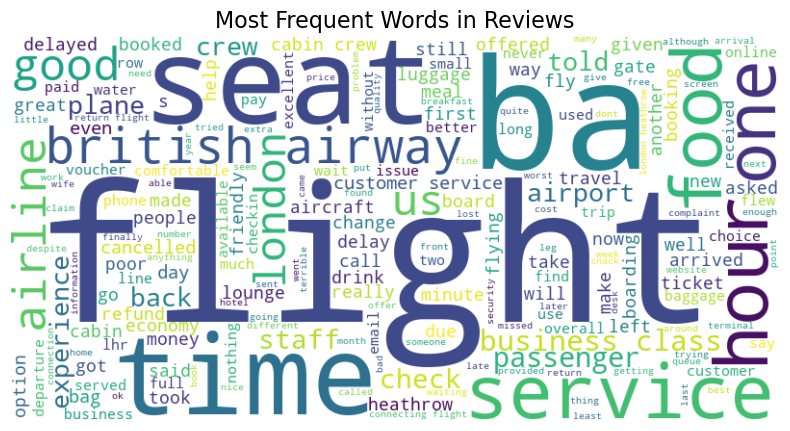

In [19]:
# Word Cloud using cleaned Review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_words = " ".join(df["Cleaned_Review"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Reviews", fontsize=16)
plt.show()

In [20]:
!pip install textblob


In [21]:
from textblob import TextBlob

# Define a function to classify sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the cleaned reviews
df["Sentiment"] = df["Cleaned_Review"].apply(get_sentiment)

# Display sentiment counts
print(df["Sentiment"].value_counts())


Sentiment
Positive    615
Negative    373
Neutral      12
Name: count, dtype: int64


In [22]:
# Display Positive Reviews
positive_reviews = df[df["Sentiment"] == "Positive"]
print("Positive Reviews:")
print(positive_reviews["Cleaned_Review"].head())

# Display Negative Reviews
negative_reviews = df[df["Sentiment"] == "Negative"]
print("\nNegative Reviews:")
print(negative_reviews["Cleaned_Review"].head())

# Display Neutral Reviews
neutral_reviews = df[df["Sentiment"] == "Neutral"]
print("\nNeutral Reviews:")
print(neutral_reviews["Cleaned_Review"].head())


Positive Reviews:
0       check in was fine but no priorityfast track...
1       british airways is absolute rubbish i had t...
2       the flight time was changed at the last min...
4       we have sat on this plane for an hour and f...
6         although like many these days i avoid ba ...
Name: Cleaned_Review, dtype: object

Negative Reviews:
3          im so fraustrated my flight was cancelled...
5       british airways stranding my wife and i at h...
8      the worst airline i have ever flown with they...
9          disappointing service plane interior and ...
10         a transit visa is required for my partner...
Name: Cleaned_Review, dtype: object

Neutral Reviews:
24      we bought tickets for a genevalondon flight b...
51          flight changed just one day before from b...
144       communication and customer service non exis...
272        in june my flight was cancelled within thr...
304     ba is not treating its premium economy passen...
Name: Cleaned_Review, dtype: obje

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download

# Download the VADER lexicon
download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiment
def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply VADER sentiment analysis to the cleaned reviews
df["Sentiment_VADER"] = df["Cleaned_Review"].apply(vader_sentiment)

# Display sentiment counts
print(df["Sentiment_VADER"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lijis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_VADER
Negative    515
Positive    464
Neutral      21
Name: count, dtype: int64


In [24]:
# Display Positive Reviews
positive_reviews_vader = df[df["Sentiment_VADER"] == "Positive"]
print("Positive Reviews (VADER):")
print(positive_reviews_vader["Cleaned_Review"].head())

# Display Negative Reviews
negative_reviews_vader = df[df["Sentiment_VADER"] == "Negative"]
print("\nNegative Reviews (VADER):")
print(negative_reviews_vader["Cleaned_Review"].head())

# Display Neutral Reviews
neutral_reviews_vader = df[df["Sentiment_VADER"] == "Neutral"]
print("\nNeutral Reviews (VADER):")
print(neutral_reviews_vader["Cleaned_Review"].head())



Positive Reviews (VADER):
0        check in was fine but no priorityfast track...
7        this flight was british airways at its very...
11         i was surprised to receive confirmation p...
14         singapore to heathrow with ba two choices...
17     the flight wasn’t that bad although the infli...
Name: Cleaned_Review, dtype: object

Negative Reviews (VADER):
1       british airways is absolute rubbish i had t...
2       the flight time was changed at the last min...
3         im so fraustrated my flight was cancelled...
4       we have sat on this plane for an hour and f...
5      british airways stranding my wife and i at h...
Name: Cleaned_Review, dtype: object

Neutral Reviews (VADER):
10          a transit visa is required for my partner...
97        i sat in the plane at vienna airport for th...
119        this is the first time i have seen the new...
131       not a great experience at all from the outs...
148        london heathrow to istanbul at the start o...
Name: Cle

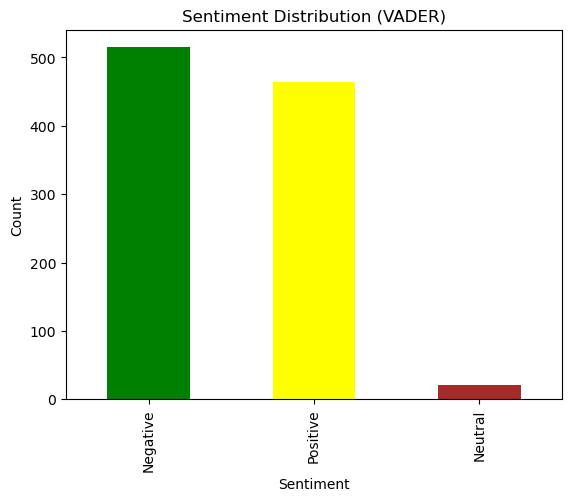

In [25]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = df["Sentiment_VADER"].value_counts()
sentiment_counts.plot(kind="bar", color=["green", "yellow", "brown"])
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


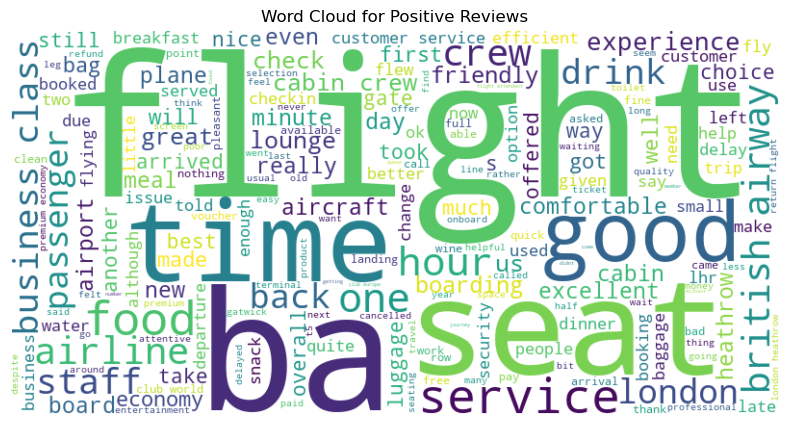

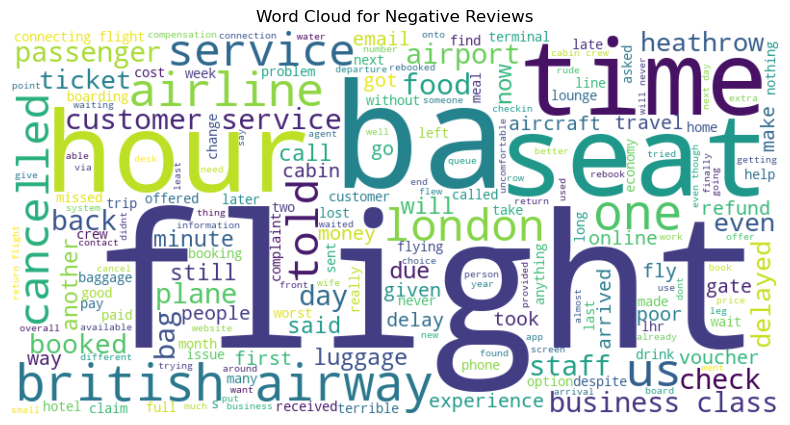

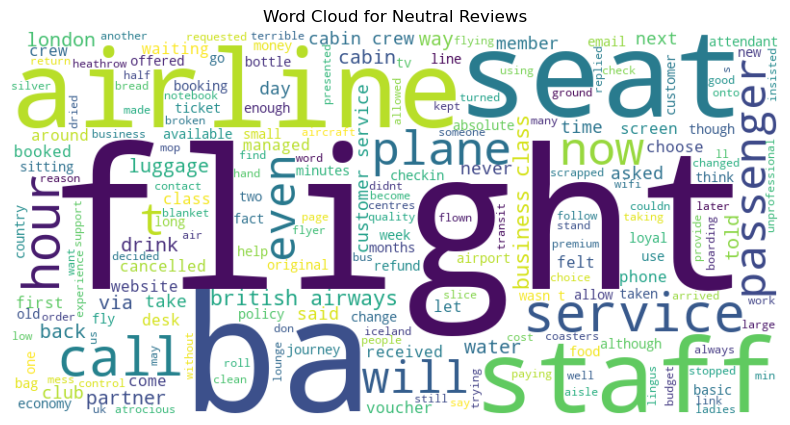

In [26]:
# Generate word clouds for each sentiment
from wordcloud import WordCloud

for sentiment in ["Positive", "Negative", "Neutral"]:
    reviews = " ".join(df[df["Sentiment_VADER"] == sentiment]["Cleaned_Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()


In [27]:
# Calculate percentages of each sentiment
total_reviews = len(df)
sentiment_counts = df["Sentiment_VADER"].value_counts()
percentages = (sentiment_counts / total_reviews) * 100

# Display metrics
print("Sentiment Analysis Summary:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews ({percentages[sentiment]:.2f}%)")


Sentiment Analysis Summary:
Negative: 515 reviews (51.50%)
Positive: 464 reviews (46.40%)
Neutral: 21 reviews (2.10%)


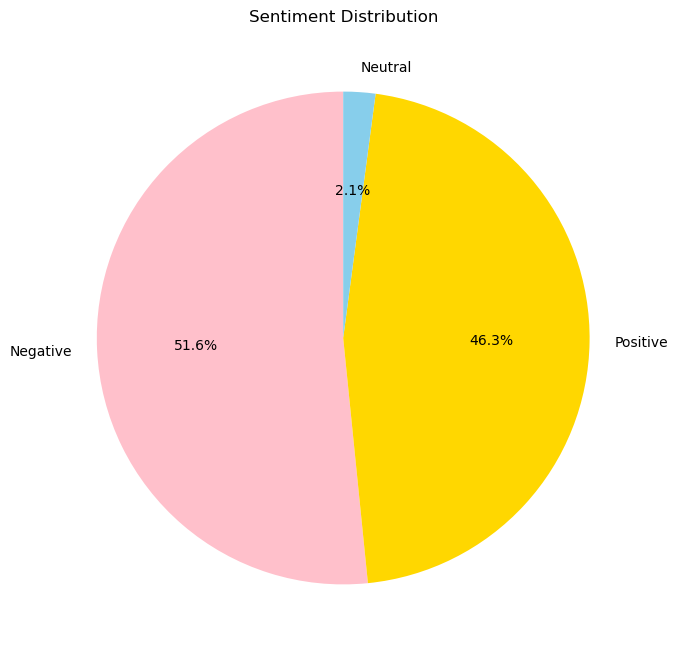

In [28]:
import matplotlib.pyplot as plt

# Sentiment counts from your data
sentiment_counts = {
    "Negative": 516,
    "Positive": 463,
    "Neutral": 21
}

# Prepare data for chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['pink', 'gold', 'skyblue']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sentiment Distribution")
plt.show()



In [29]:
# Save the final dataset with sentiment analysis
df.to_csv("data/BA_reviews_with_sentiment.csv", index=False)
print("Dataset with sentiment saved successfully!")


Dataset with sentiment saved successfully!


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df["Cleaned_Review"])

# Step 2: Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify number of topics
lda_model.fit(dtm)

# Step 3: Display the top words for each topic
print("Top words per topic:")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Top words per topic:
Topic 1:
['cabin', 'time', 'hour', 'food', 'business', 'class', 'service', 'staff', 'flight', 'ba']
Topic 2:
['airport', 'london', 'customer', 'told', 'hours', 'service', 'airways', 'british', 'ba', 'flight']
Topic 3:
['time', 'service', 'food', 'seats', 'ba', 'seat', 'business', 'good', 'class', 'flight']
Topic 4:
['crew', 'london', 'experience', 'airways', 'british', 'airlines', 'airline', 'service', 'flight', 'ba']
Topic 5:
['good', 'really', 'boarding', 'time', 'service', 'food', 'cabin', 'ba', 'crew', 'flight']


In [31]:
# Assign dominant topic to each review
df['Dominant_Topic'] = lda_model.transform(dtm).argmax(axis=1)

# Display a few reviews with their assigned topics
print(df[['Cleaned_Review', 'Dominant_Topic']].head())


                                      Cleaned_Review  Dominant_Topic
0     check in was fine but no priorityfast track...               2
1     british airways is absolute rubbish i had t...               1
2     the flight time was changed at the last min...               0
3       im so fraustrated my flight was cancelled...               1
4     we have sat on this plane for an hour and f...               1


In [32]:
# Count the number of reviews per topic
topic_distribution = df['Dominant_Topic'].value_counts()

# Display the topic distribution
print(topic_distribution)


Dominant_Topic
1    430
2    308
4    126
3     81
0     55
Name: count, dtype: int64


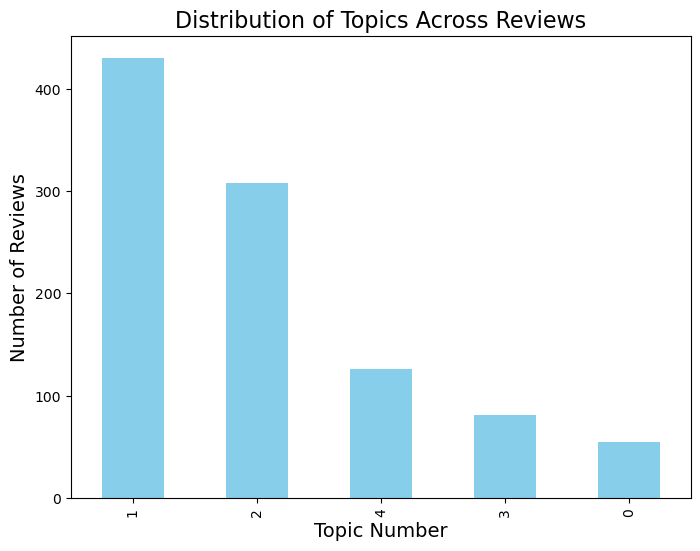

In [33]:
import matplotlib.pyplot as plt

# Plot topic distribution
topic_distribution.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of Topics Across Reviews', fontsize=16)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.show()


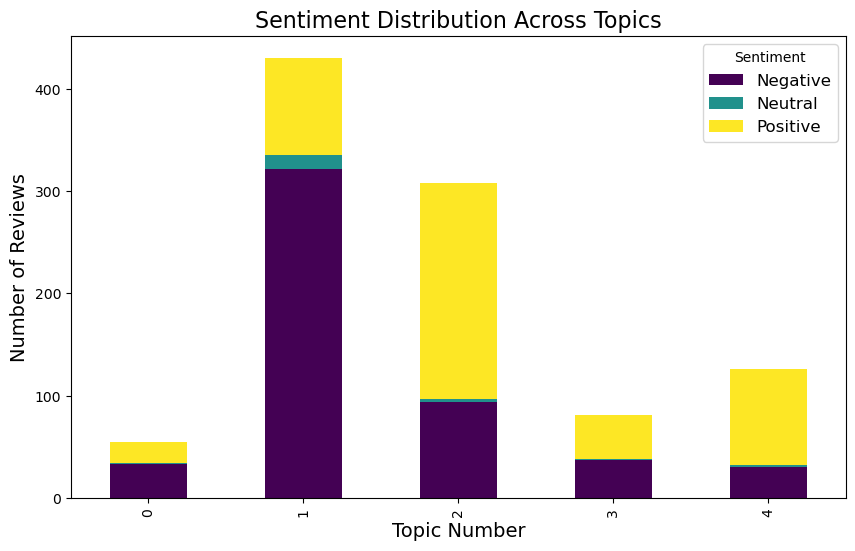

In [34]:
# Group by Dominant_Topic and Sentiment
topic_sentiment_distribution = df.groupby(['Dominant_Topic', 'Sentiment_VADER']).size().unstack()

# Plot the distribution
topic_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution Across Topics', fontsize=16)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.show()


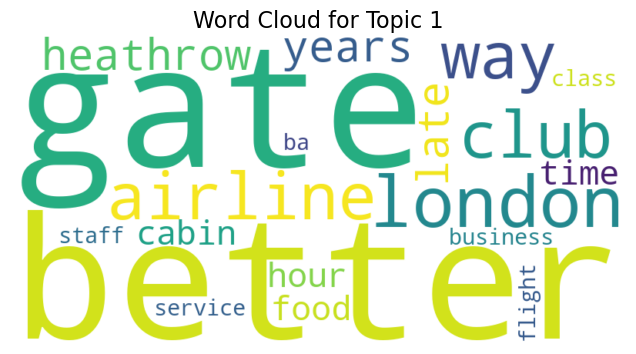

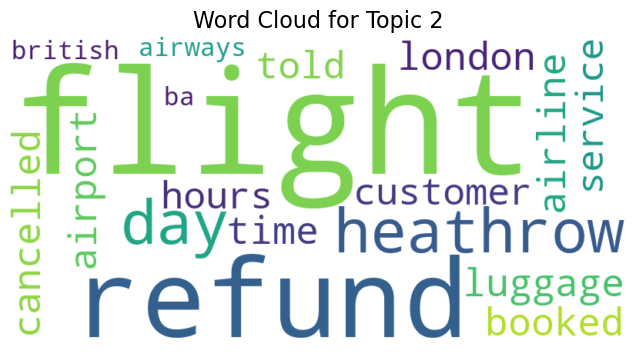

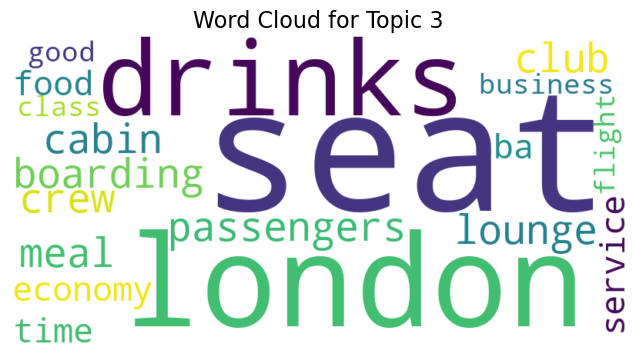

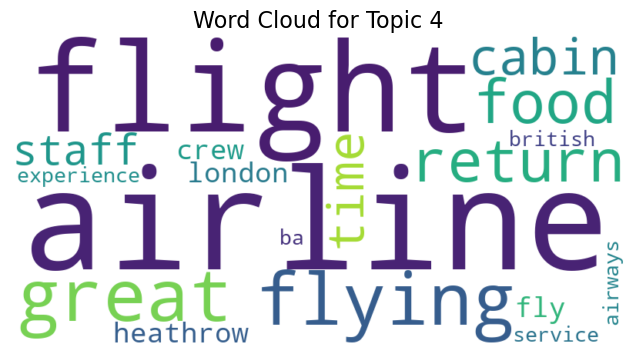

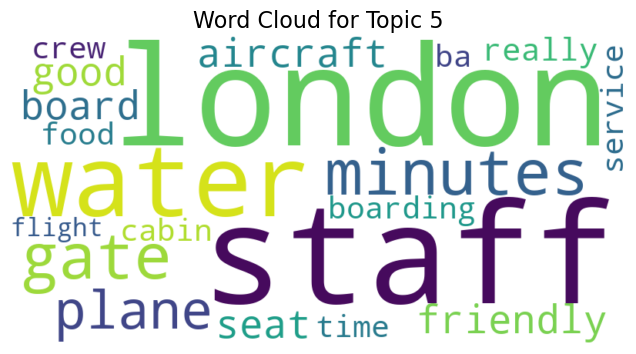

In [35]:
from wordcloud import WordCloud

# Plot word clouds for each topic
for idx, topic in enumerate(lda_model.components_):
    plt.figure(figsize=(8, 4))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {idx + 1}", fontsize=16)
    plt.show()
